# 1. Import dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoint Using MP Holistics

In [2]:
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color Conversion
    image.flags.writeable = False # image is unwriteable
    results = model.process(image) # make predictable
    image.flags.writeable = True # image is writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color Conversion
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2),
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2),
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),
        )

In [69]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

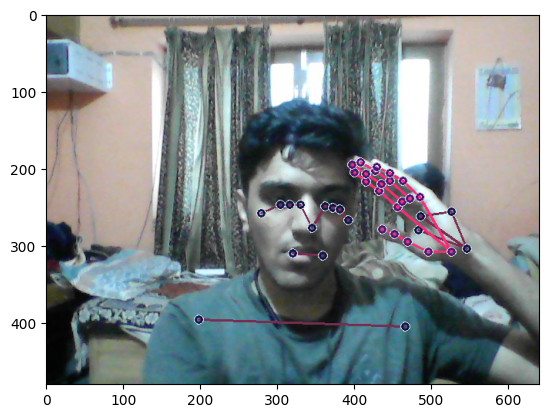

In [70]:
draw_styled_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoints Values for Training and Testing

In [8]:
def extract_keypoints(results):
    pose = (
        np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
        if results.pose_landmarks
        else np.zeros(33 * 4)  # 33 pose landmarks, each with 4 attributes
    )
    lh = (
        np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()
        if results.left_hand_landmarks
        else np.zeros(21 * 3)  # 21 hand landmarks, each with 3 attributes
    )
    rh = (
        np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()
        if results.right_hand_landmarks
        else np.zeros(21 * 3)  # 21 hand landmarks, each with 3 attributes
    )
    return np.concatenate([pose, lh, rh])

In [19]:
len(results.right_hand_landmarks.landmark)

21

# 4. Setup Folders for collection

In [9]:
DATA_PATH = os.path.join('MP_DATA_1')

# Ensure the data path exists
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Actions that we try to detect
actions = np.array(['Hello','Thanks','ILoveYou'])
# thirty videos worth of data
no_sequences = 30

# thirty frames per video
sequence_length = 30

In [10]:
# Create directories for each action and sequence
for action in actions:
    for sequence in range(no_sequences):
        dir_path = os.path.join(DATA_PATH, action, str(sequence))
        try:
            os.makedirs(dir_path, exist_ok=True)  # Use exist_ok to handle already existing directories
            print(f"Created directory: {dir_path}")
        except Exception as e:
            print(f"Error creating directory {dir_path}: {e}")

Created directory: MP_DATA_1\Hello\0
Created directory: MP_DATA_1\Hello\1
Created directory: MP_DATA_1\Hello\2
Created directory: MP_DATA_1\Hello\3
Created directory: MP_DATA_1\Hello\4
Created directory: MP_DATA_1\Hello\5
Created directory: MP_DATA_1\Hello\6
Created directory: MP_DATA_1\Hello\7
Created directory: MP_DATA_1\Hello\8
Created directory: MP_DATA_1\Hello\9
Created directory: MP_DATA_1\Hello\10
Created directory: MP_DATA_1\Hello\11
Created directory: MP_DATA_1\Hello\12
Created directory: MP_DATA_1\Hello\13
Created directory: MP_DATA_1\Hello\14
Created directory: MP_DATA_1\Hello\15
Created directory: MP_DATA_1\Hello\16
Created directory: MP_DATA_1\Hello\17
Created directory: MP_DATA_1\Hello\18
Created directory: MP_DATA_1\Hello\19
Created directory: MP_DATA_1\Hello\20
Created directory: MP_DATA_1\Hello\21
Created directory: MP_DATA_1\Hello\22
Created directory: MP_DATA_1\Hello\23
Created directory: MP_DATA_1\Hello\24
Created directory: MP_DATA_1\Hello\25
Created directory: MP_

# 5. Collect Keypoint values for Training and Testing

In [9]:
from time import sleep
cap = cv2.VideoCapture(0)

def display_countdown(image, seconds, text, position=(100, 200)):
    """Display a countdown on the screen."""
    for i in range(seconds, 0, -1):
        # Clear the screen
        image.fill(0)  # This resets the frame to black for a clean slate
        # Display the countdown text
        cv2.putText(image, f"{text}: {i}", position, 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(1000) & 0xFF == ord('q'):  # Update every second
            break
# Set MediaPipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Display a 10-second countdown before starting the action
        ret, frame = cap.read()
        display_countdown(frame, 10, f"Get Ready for {action}")

        # Loop through sequences (videos)
        for sequence in range(no_sequences):
            # Display a 3-second countdown before each gesture
            ret, frame = cap.read()
            display_countdown(frame, 3, f"Next Gesture {sequence + 1}")

            # Loop through frames
            for frame_num in range(sequence_length):
                # Read feed
                ret, frame = cap.read()
                if not ret:
                    print("Failed to read from webcam.")
                    break
                
                # Make detection
                image, results = mediapipe_detection(frame, holistic)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Display starting message
                if frame_num == 0:
                    cv2.putText(
                        image, 'STARTING COLLECTION', (120, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA
                    )
                    cv2.putText(
                        image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA
                    )
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)  # Pause for two seconds
                else:
                    cv2.putText(
                        image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA
                    )
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    print("User interrupted. Exiting...")
                    break
                
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess data and create Labels and Features 

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num,label in enumerate(actions)}
label_map

{'Hello': 0, 'Thanks': 1, 'ILoveYou': 2}

In [27]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(90, 30, 258)

In [30]:
y = to_categorical(labels).astype(int)

In [33]:
y.shape

(90, 3)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
print(X_train.shape, y_train.shape)

(85, 30, 258) (85, 3)


In [36]:
print(X_test.shape, y_test.shape)

(5, 30, 258) (5, 3)


# 7. Build and Train LSTM Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(Input(shape=(30, 258)))  # Use Input layer for input shape
model.add(LSTM(64, return_sequences=True, activation='swish'))
model.add(LSTM(128, return_sequences=True, activation='swish'))
model.add(LSTM(64, return_sequences=False, activation='swish'))
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(actions.shape[0], activation='softmax'))  # Number of classes

In [42]:
# example usage
res = [0.7, 0.2, 0.1]
actions[np.argmax(res)]

'Hello'

In [43]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - categorical_accuracy: 0.2584 - loss: 1.0969
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3326 - loss: 1.0577
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.3190 - loss: 1.0488
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.3895 - loss: 1.0344
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.4228 - loss: 0.9496
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.5303 - loss: 0.8498
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.6437 - loss: 0.7860
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.5128 - loss: 1.1806
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.5460 - loss: 0.9576
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.4950 - loss: 0.9190
Epoch 11/2000
3/3 ━━━━━━━━━━━

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          82,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 711,755 (2.72 MB)

 Trainable params: 237,251 (926.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 474,504 (1.81 MB)

# 8. Make Predictions

In [73]:
res=model.predict(X_test)
res.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


(5, 3)

In [48]:
actions[np.argmax(res[4])]

'ILoveYou'

In [49]:
actions[np.argmax(y_test[4])]

'ILoveYou'

# 9. Save Weights

In [50]:
model.save('action2.keras')

In [35]:
del model

In [29]:
from tensorflow.keras.models import load_model

In [30]:
model = load_model('action2.keras')

# 10. Evaluation using Confusion Matrix and Accuracy

In [51]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [58]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 


In [59]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [60]:
yhat

[2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2]

In [61]:
ytrue

[2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2]

In [62]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [ 0, 29]],

       [[55,  0],
        [ 0, 30]],

       [[59,  0],
        [ 0, 26]]], dtype=int64)

In [63]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [64]:
from scipy import stats

In [71]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

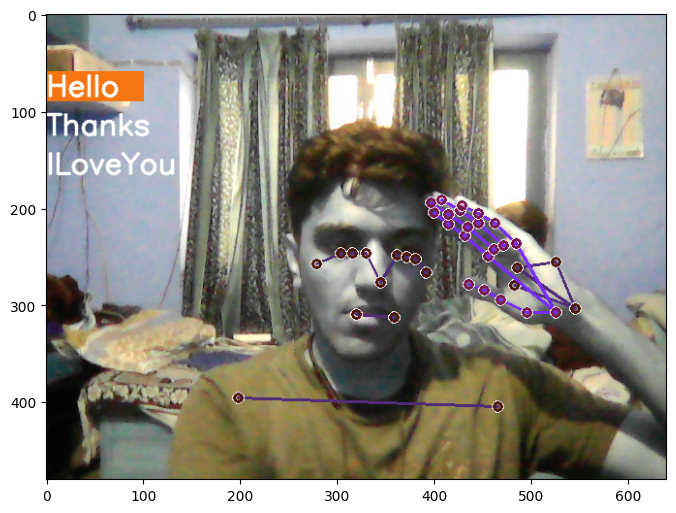

In [76]:
plt.figure(figsize=(8,8))
plt.imshow(prob_viz(res[0], actions, image, colors))  # Use res[0] or another row

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti